In [10]:
import h5py

# Path to your TVB .h5 file
file_path = '/home/pablo/works/dev_thesis_SEEG/data/pte_01_TVB/Sensors_568ffb7358f84a0eb4e9ea3ff9a4568b.h5'

# Open the file in read mode
with h5py.File(file_path, 'r') as h5_file:
    # Explore the structure of the file
    print("File structure:")
    def print_structure(name, obj):
        if isinstance(obj, h5py.Group):
            print(f"Group: {name}")
        elif isinstance(obj, h5py.Dataset):
            print(f"Dataset: {name} - Shape: {obj.shape}, Dtype: {obj.dtype}")
    h5_file.visititems(print_structure)


File structure:
Dataset: labels - Shape: (588,), Dtype: object
Dataset: locations - Shape: (588, 3), Dtype: float64


In [5]:
# Example: Extract specific dataset
if 'time_series' in h5_file:
    time_series = h5_file['time_series'][:]  # Load the dataset
    print("Time series shape:", time_series.shape)


In [6]:
# Open the file in read mode
with h5py.File(file_path, 'r') as h5_file:
    # Load the datasets
    data = h5_file['data'][:]  # Shape: (6000, 2, 588, 1)
    time = h5_file['time'][:]  # Shape: (6000,)
    
    # Print basic info
    print("Data shape:", data.shape)
    print("Time shape:", time.shape)

    # Example: Accessing the first time point
    first_time_point = data[0, :, :, 0]
    print("First time point shape:", first_time_point.shape)

    # Example: Verify time consistency
    print("Time range:", time[0], "to", time[-1])

Data shape: (6000, 2, 588, 1)
Time shape: (6000,)
First time point shape: (2, 588)
Time range: 0.5 to 5999.5


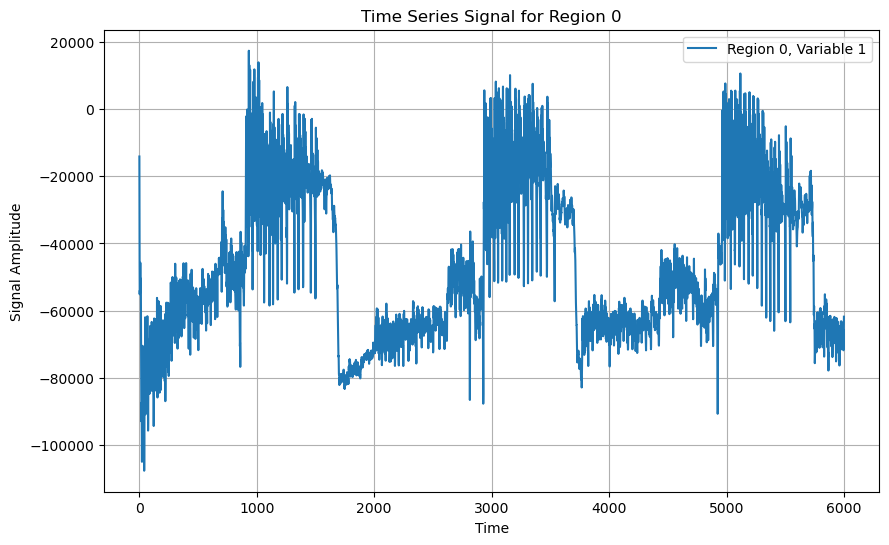

In [9]:
import matplotlib.pyplot as plt

# Select a specific region (e.g., region 0)
region_index = 0
variable_index = 1 # First signal variable

# Extract signal for the selected region and variable
signal = data[:, variable_index, region_index, 0]

# Plot the signal over time
plt.figure(figsize=(10, 6))
plt.plot(time, signal, label=f'Region {region_index}, Variable {variable_index}')
plt.title('Time Series Signal for Region 0')
plt.xlabel('Time')
plt.ylabel('Signal Amplitude')
plt.legend()
plt.grid()
plt.show()
